In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option("display.max_columns", 100)

# Carga del catálogo (ajusta ruta según tu estructura)
df = pd.read_csv("../data/raw/catalogo_escuelas_sonora.csv")

print("✅ Datos cargados correctamente")
print("Shape:", df.shape)
df.head(5)


✅ Datos cargados correctamente
Shape: (13624, 89)


,cv_cct,c_nombre,cv_tipo,c_tipo,cv_administrativa,c_administrativa,cv_estatus,c_estatus,cv_motivo,c_motivo,cv_motivon2,c_descripcnmotivo,inmueble_cv_inmueble,inmueble_cv_vialidad_principal,inmueble_c_vialidad_principal,inmueble_cv_vialidad_derecha,inmueble_c_vialidad_derecha,inmueble_cv_vialidad_izquierda,inmueble_c_vialidad_izquierda,inmueble_cv_vialidad_posterior,inmueble_c_vialidad_posterior,inmueble_n_extnum,inmueble_c_extalf,inmueble_n_intnum,inmueble_c_intalf,inmueble_cv_ent,inmueble_c_nom_ent,inmueble_cv_mun,inmueble_c_nom_mun,inmueble_cv_loc,inmueble_c_nom_loc,inmueble_cv_asen,inmueble_c_nom_asen,inmueble_cv_codigo_postal,inmueble_c_desc_ubicacion,latitud,longitud,sostenimiento_cv_control,sostenimiento_c_control,sostenimiento_cv_subcontrol,sostenimiento_c_subcontrol,sostenimiento_cv_dependencian1,sostenimiento_c_dependencian1,sostenimiento_cv_dependencian2,sostenimiento_c_dependencian2,sostenimiento_cv_dependencian3,sostenimiento_c_dependencian3,sostenimiento_cv_dependencian4,sostenimiento_c_dependencian4,sostenimiento_cv_dependencian5,sostenimiento_cv_servicio,sostenimiento_c_servicio,depoperativa_cv_dependencian1,depoperativa_c_dependencian1,depoperativa_cv_dependencian2,depoperativa_c_dependencian2,depoperativa_cv_dependencian3,depoperativa_c_dependencian3,depoperativa_cv_dependencian4,depoperativa_c_dependencian4,depoperativa_cv_dependencian5,contacto_c_curp,contacto_c_rfc,contacto_c_nombre,contacto_c_apellido1,contacto_c_apellido2,contacto_c_email,contacto_c_telefono,contacto_c_celular,contacto_c_extension,contacto_c_pweb,serreg_cv_cct,jefsec_cv_cct,supervision_cv_cct,institucion,c_tuno_01,c_tuno_2,c_tuno_3,tiponivelsub_cv_servicion1,tiponivelsub_c_servicion1,tiponivelsub_cv_servicion2,tiponivelsub_c_servicion2,tiponivelsub_cv_servicion3,tiponivelsub_c_servicion3,caracteristca_cv_caracterizan1,caracteristca_c_caracterizan1,caracteristca_cv_caracterizan2,caracteristca_c_caracterizan2,fn_sostenimiento_cv_servicio
0,26BBE2696K,BIBLIOTECA DE LA PREPARATORIA POPULAR MEXICO,7,BIBLIOTECA,26,SONORA,0,INACTIVO,3,CAUSAS ADMINISTRATIVAS,5,OTRA ESPECIFIQUE,26INM36551,118994,NINGUNO NINGUNO,455637,NINGUNO NINGUNO,725225,NINGUNO NINGUNO,1023060,NINGUNO NINGUNO,0,DOMICILIO CONOCIDO SN,0,NaN,26,SONORA,55,SAN LUIS RÃO COLORADO,1,SAN LUIS RÃO COLORADO,34,NINGUNO,0,NaN,32.476667,-114.762500,2.0,PRIVADO,1.0,PRIVADO,1.0,INICIATIVA PRIVADA,1.0,ASOCIACIÃN CIVIL,0.0,NaN,0.0,NaN,0.0,B03,BIBLIOTECA ESCOLAR DE NIVEL MEDIO SUPERIOR (BA...,1.0,INICIATIVA PRIVADA,1.0,ASOCIACIÃN CIVIL,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,TESTADO,NaN,NaN,NaN,26ADG0004T,NaN,NaN,NaN,DISCONTINUO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26KPR0173F,CURSO COMUNITARIO,9,ESCUELA,26,SONORA,0,INACTIVO,3,CAUSAS ADMINISTRATIVAS,5,OTRA ESPECIFIQUE,26INM364DF,118984,NINGUNO NINGUNO,455614,NINGUNO NINGUNO,725199,NINGUNO NINGUNO,1023034,NINGUNO NINGUNO,0,DOMICILIO CONOCIDO SN,0,NaN,26,SONORA,52,SAHUARIPA,545,LA CEBADILLA,1,NINGUNO,85600,NaN,29.255556,-108.967222,1.0,PÃBLICO,1.0,FEDERAL,1.0,PRESIDENCIA DE LA REPÃBLICA,2.0,SECRETARÃA DE EDUCACIÃN PÃBLICA,6.0,ORGANISMOS DESCENTRALIZADOS DE LA SECRETARÃA ...,9.0,CONSEJO NACIONAL DE FOMENTO EDUCATIVO,0.0,9999,SERVICIO EDUCATIVO,1.0,PRESIDENCIA DE LA REPÃBLICA,2.0,SECRETARÃA DE EDUCACIÃN PÃBLICA,6.0,ORGANISMOS DESCENTRALIZADOS DE LA SECRETARÃA ...,9.0,CONSEJO NACIONAL DE FOMENTO EDUCATIVO,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26ADG0016Y,NaN,NaN,NaN,MATUTINO,NaN,NaN,2.0,BÃSICA,2.0,PRIMARIA,2.0,COMUNITARIO,0.0,NO APLICA,0.0,NO APLICA,9999.0
2,26KPR0193T,CURSO COMUNITARIO,9,ESCUELA,26,SONORA,0,INACTIVO,3,CAUSAS ADMINISTRATIVAS,5,OTRA ESPECIFIQUE,26INM35CF4,117880,NINGUNO NINGUNO,454353,NINGUNO NINGUNO,723941,NINGUNO NINGUNO,1021670,NINGUNO NINGUNO,0,DOMICILIO CONOCIDO SN,0,NaN,26,SONORA,30,HERMOSILLO,138,EL BAJÃO,1,NINGUNO,83340,NaN,28.795000,-111.271389,1.0,PÃBLICO,1.0,FEDERAL,1.0,PRESIDENCIA DE LA REPÃBLICA,2.0,SECRETARÃA DE EDUCACIÃN PÃBLICA,6.0,ORGANISMOS DESCENTRALIZADOS DE LA SECRETA

In [88]:
df.info()

# Columnas con valores nulos
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'faltantes': missing, 'porcentaje': missing_pct})
display(missing_df.head(15))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13624 entries, 0 to 13623
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cv_cct                          13624 non-null  object 
 1   c_nombre                        13624 non-null  object 
 2   cv_tipo                         13624 non-null  int64  
 3   c_tipo                          13624 non-null  object 
 4   cv_administrativa               13624 non-null  int64  
 5   c_administrativa                13624 non-null  object 
 6   cv_estatus                      13624 non-null  int64  
 7   c_estatus                       13624 non-null  object 
 8   cv_motivo                       13624 non-null  int64  
 9   c_motivo                        6050 non-null   object 
 10  cv_motivon2                     13624 non-null  int64  
 11  c_descripcnmotivo               6049 non-null   object 
 12  inmueble_cv_inmueble            

,faltantes,porcentaje
c_tuno_3,13594,99.779800
inmueble_c_desc_ubicacion,13496,99.060482
inmueble_c_intalf,13449,98.715502
c_tuno_2,13243,97.203464
contacto_c_pweb,13078,95.992366
institucion,12901,94.693188
contacto_c_extension,12887,94.590429
sostenimiento_c_dependencian4,10662,78.258955
sostenimiento_c_dependencian3,10093,74.082501
contacto_c_celular,9547,70.074868


In [89]:
cols_utiles = [
    "cv_cct", "c_nombre", "cv_estatus", "c_estatus",
    "tiponivelsub_c_servicion2", "tiponivelsub_c_servicion3",
    "sostenimiento_c_control", "inmueble_c_nom_mun"
]

df = df[cols_utiles]
df.columns = [
    "cct", "nombre", "cv_estatus", "estatus",
    "nivel1", "nivel2", "sostenimiento", "municipio"
]

df['sostenimiento'] = df['sostenimiento'].replace('PÃBLICO', 'PÚBLICO')

print("✅ Columnas filtradas:", df.shape)
df[df['municipio']=='ÃLAMOS']

✅ Columnas filtradas: (13624, 8)


,cct,nombre,cv_estatus,estatus,nivel1,nivel2,sostenimiento,municipio
39,26KJN0021K,PREESCOLAR COMUNITARIO,1,ACTIVO,PREESCOLAR,COMUNITARIO,PÚBLICO,ÃLAMOS
169,26AIZ0028M,INSPECCION ESCOLAR NUM. 28,0,INACTIVO,NaN,NaN,PÚBLICO,ÃLAMOS
175,26KJN0178K,PREESCOLAR COMUNITARIO,0,INACTIVO,PREESCOLAR,COMUNITARIO,PÚBLICO,ÃLAMOS
256,26DPR0774P,JESUS GARCIA,0,INACTIVO,PRIMARIA,GENERAL,PÚBLICO,ÃLAMOS
275,26DPB0170Y,ESCUELA PRIMARIA NUEVA CREACION,0,INACTIVO,PRIMARIA,INDÃGENA,PÚBLICO,ÃLAMOS
...,...,...,...,...,...,...,...,...
13568,26DPR0738K,EMILIANO ZAPATA,0,INACTIVO,PRIMARIA,GENERAL,PÚBLICO,ÃLAMOS
13576,26DPR0861K,RICARDO FLORES MAGON,0,INACTIVO,PRIMARIA,GENERAL,PÚBLICO,ÃLAMOS
13577,26DPR0974N,AQUILES SERDAN,0,INACTIVO,PRIMARIA,GENERAL,PÚBLICO,ÃLAMOS
13585,26DPR0900W,JESUS GARCIA,0,INACTIVO,PRIMARIA,GENERAL,PÚBLICO,ÃLAMOS


In [90]:
import pandas as pd

municipios_seleccionados = [
    'ÃLAMOS', 'BACERAC', 'SAHUARIPA', 'HUATABAMPO', 'CABORCA',
    'EMPALME', 'AGUA PRIETA', 'SANTA ANA', 'MAGDALENA', 'GUAYMAS',
    'NAVOJOA', 'MOCTEZUMA', 'CANANEA', 'NOGALES', 'CAJEME',
    'HERMOSILLO',
]

columna_estatus = 'estatus'
valor='ACTIVO'

# 1. Agrupamos por 'municipio' y 'sostenimiento', y contamos cuántas filas (escuelas) hay en cada grupo.
filtro_municipios = df['municipio'].isin(municipios_seleccionados)
filtro_activo = df['estatus'] == valor

df['municipio'] = df['municipio'].replace('ÃLAMOS', 'ÁLAMOS')
df_filtrado = df[filtro_municipios & filtro_activo]



conteo_agrupado = df_filtrado.groupby(['municipio', 'sostenimiento']).size()
conteo_agrupado

# 2. Usamos unstack() para transformar la lista larga en una tabla bonita.
#    'sostenimiento' (PÚBLICO/PRIVADO) se convertirá en las columnas.
#    fill_value=0 pone un 0 si un municipio no tiene un tipo de escuela (ej. sin privadas).
tabla_conteo_escuelas = conteo_agrupado.unstack(fill_value=0)
municipios_seleccionados = [
    'ÁLAMOS', 'BACERAC', 'SAHUARIPA', 'HUATABAMPO', 'CABORCA',
    'EMPALME', 'AGUA PRIETA', 'SANTA ANA', 'MAGDALENA', 'GUAYMAS',
    'NAVOJOA', 'MOCTEZUMA', 'CANANEA', 'NOGALES', 'CAJEME',
    'HERMOSILLO',
]
tabla_ordenada = tabla_conteo_escuelas.reindex(municipios_seleccionados)

# 3. Mostramos la tabla final
print("Conteo de Escuelas por Municipio y Sostenimiento:")
print(tabla_conteo_escuelas)



Conteo de Escuelas por Municipio y Sostenimiento:
sostenimiento  PRIVADO  PÚBLICO
municipio                      
AGUA PRIETA         46      113
BACERAC              0       15
CABORCA             30      206
CAJEME             241      616
CANANEA             35       82
EMPALME             21      122
GUAYMAS             81      371
HERMOSILLO         581     1159
HUATABAMPO          15      392
MAGDALENA           22       78
MOCTEZUMA            0       32
NAVOJOA             74      490
NOGALES            149      276
SAHUARIPA            0       42
SANTA ANA            6       56
ÁLAMOS               2      289


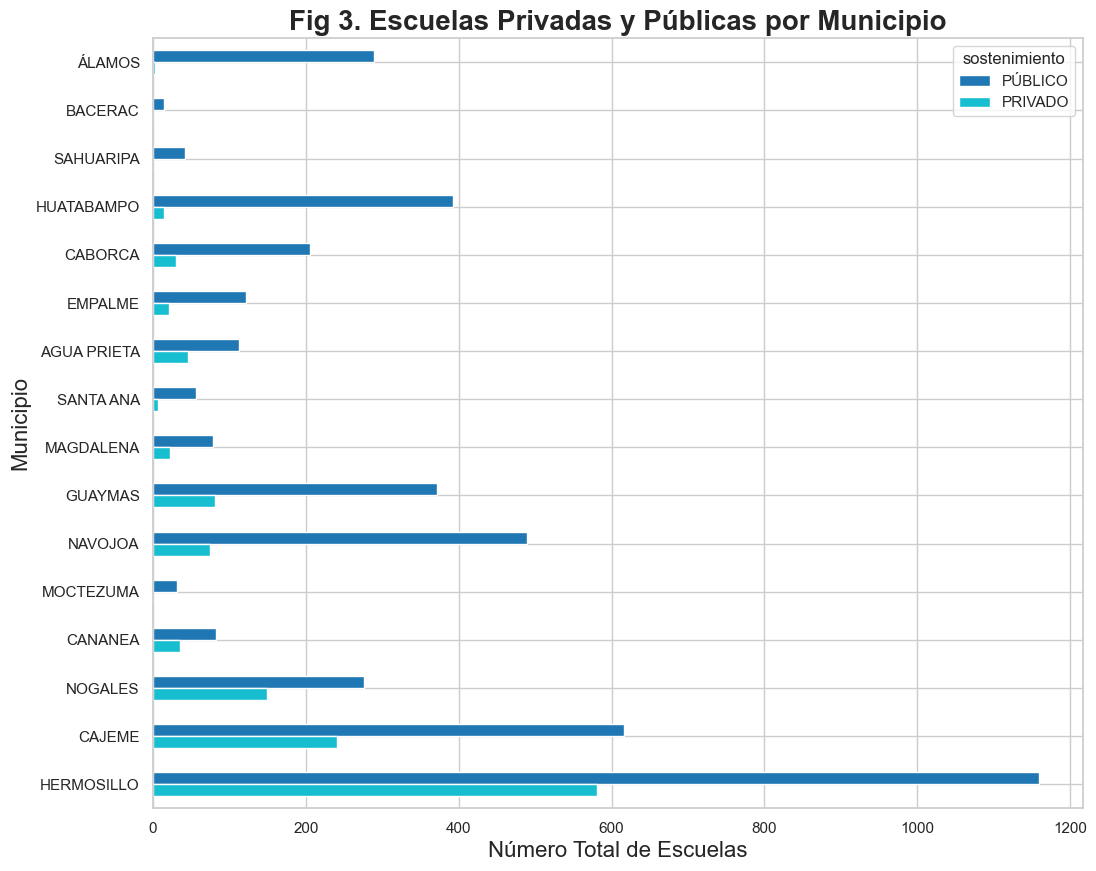

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

municipios_seleccionados = [
    'ÁLAMOS', 'BACERAC', 'SAHUARIPA', 'HUATABAMPO', 'CABORCA',
    'EMPALME', 'AGUA PRIETA', 'SANTA ANA', 'MAGDALENA', 'GUAYMAS',
    'NAVOJOA', 'MOCTEZUMA', 'CANANEA', 'NOGALES', 'CAJEME',
    'HERMOSILLO',
]

sns.set_theme(style="whitegrid")


fig, ax = plt.subplots(figsize=(12, 10))


tabla_ordenada[['PÚBLICO', 'PRIVADO']].plot(
    kind='barh', 
    #stacked=True, 
    ax=ax,
    colormap='tab10'
)

# 5. AJUSTES FINALES
ax.set_title('Fig 3. Escuelas Privadas y Públicas por Municipio', fontsize=20, weight='bold')
ax.set_xlabel('Número Total de Escuelas', fontsize=16)
ax.set_ylabel('Municipio', fontsize=16)


ax.invert_yaxis()

pub_priv_mun_path = os.path.join(FIG_DIR, "escuelas_publicas_privadas_municipio.png")
plt.savefig(pub_priv_mun_path, dpi=200)

plt.show()

In [4]:
FIG_DIR = "../reports/figures"
TAB_DIR = "../reports/tables"
REP_DIR = "../reports"

os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(TAB_DIR, exist_ok=True)
os.makedirs(REP_DIR, exist_ok=True)

C:\Users\JAM\AppData\Local\Temp\ipykernel_15348\2921676736.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estatus_count.index, y=estatus_count.values, palette="crest")


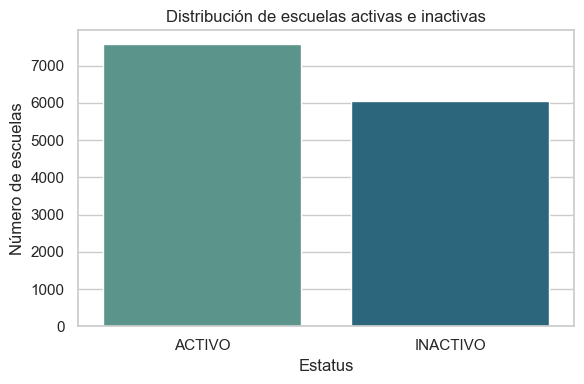

estatus
ACTIVO      7574
INACTIVO    6050
Name: count, dtype: int64


In [107]:
# ==========================================
# 4. Análisis de estatus de escuelas
# ==========================================
estatus_count = df["estatus"].value_counts(dropna=False)

plt.figure(figsize=(6,4))
sns.barplot(x=estatus_count.index, y=estatus_count.values, palette="crest")
plt.title("Distribución de escuelas activas e inactivas")
plt.ylabel("Número de escuelas")
plt.xlabel("Estatus")
plt.tight_layout()
plt.show()

print(estatus_count)


C:\Users\JAM\AppData\Local\Temp\ipykernel_15348\4076387128.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=niveles.index, x=niveles.values, palette="viridis")
C:\Users\JAM\AppData\Local\Temp\ipykernel_15348\4076387128.py:11: UserWarning: Glyph 141 (\x8d) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\JAM\AppData\Local\Temp\ipykernel_15348\4076387128.py:11: UserWarning: Glyph 147 (\x93) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\JAM\AppData\Local\Temp\ipykernel_15348\4076387128.py:11: UserWarning: Glyph 137 (\x89) missing from font(s) Arial.
  plt.tight_layout()
D:\Documentos\GitHub\desigualdad_educativa\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Documentos\GitHub\desigualdad_educativa\.venv\L

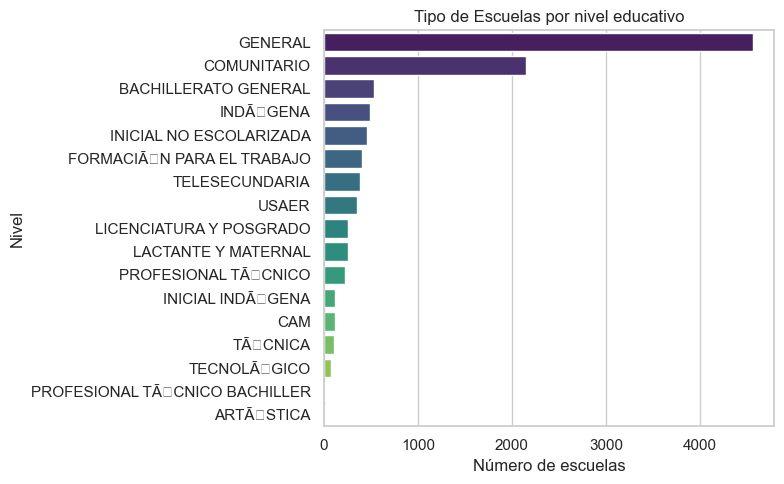

nivel2
GENERAL                           4560
COMUNITARIO                       2152
BACHILLERATO GENERAL               531
INDÃGENA                          490
INICIAL NO ESCOLARIZADA            458
FORMACIÃN PARA EL TRABAJO         406
TELESECUNDARIA                     379
USAER                              348
LICENCIATURA Y POSGRADO            260
LACTANTE Y MATERNAL                257
PROFESIONAL TÃCNICO               224
INICIAL INDÃGENA                  118
CAM                                117
TÃCNICA                           105
TECNOLÃGICO                        81
PROFESIONAL TÃCNICO BACHILLER      14
ARTÃSTICA                          13
Name: count, dtype: int64


In [108]:
# ==========================================
# 5. Distribución por nivel educativo
# ==========================================
niveles = df["nivel2"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(y=niveles.index, x=niveles.values, palette="viridis")
plt.title("Tipo de Escuelas por nivel educativo")
plt.xlabel("Número de escuelas")
plt.ylabel("Nivel")
plt.tight_layout()
plt.show()

print(niveles)


C:\Users\JAM\AppData\Local\Temp\ipykernel_15348\3567823758.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sost.index, y=sost.values, palette="mako")


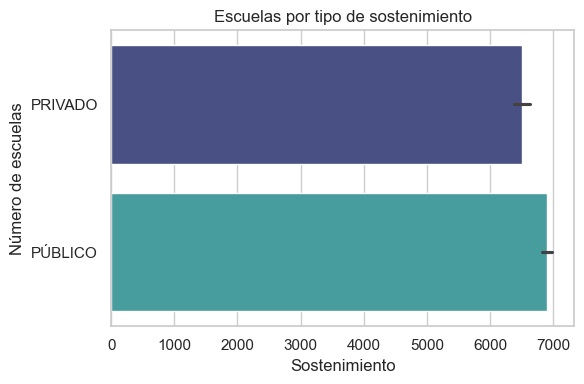

0        PRIVADO
1        PÚBLICO
2        PÚBLICO
3        PÚBLICO
4        PRIVADO
          ...   
13619    PÚBLICO
13620    PÚBLICO
13621    PÚBLICO
13622    PÚBLICO
13623    PÚBLICO
Name: sostenimiento, Length: 13624, dtype: object


In [111]:
# ==========================================
# 6. Distribución por sostenimiento
# ==========================================
sost = df["sostenimiento"] = df["sostenimiento"].replace({9999: "NO ESPECIFICADO"})


plt.figure(figsize=(6,4))
sns.barplot(x=sost.index, y=sost.values, palette="mako")
plt.title("Escuelas por tipo de sostenimiento")
plt.ylabel("Número de escuelas")
plt.xlabel("Sostenimiento")
plt.tight_layout()

plt.show()

print(sost)


C:\Users\JAM\AppData\Local\Temp\ipykernel_15348\3444886837.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=escuelas_mpio.head(15).index, x=escuelas_mpio.head(15).values, palette="flare")
C:\Users\JAM\AppData\Local\Temp\ipykernel_15348\3444886837.py:11: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JAM\AppData\Local\Temp\ipykernel_15348\3444886837.py:11: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JAM\AppData\Local\Temp\ipykernel_15348\3444886837.py:11: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JAM\AppData\Local\Temp\ipykernel_15348\3444886837.py:14: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  plt.savefig(mayor_path, dpi=200)
C:\Users\JAM\AppData\Local\Temp\ipyker

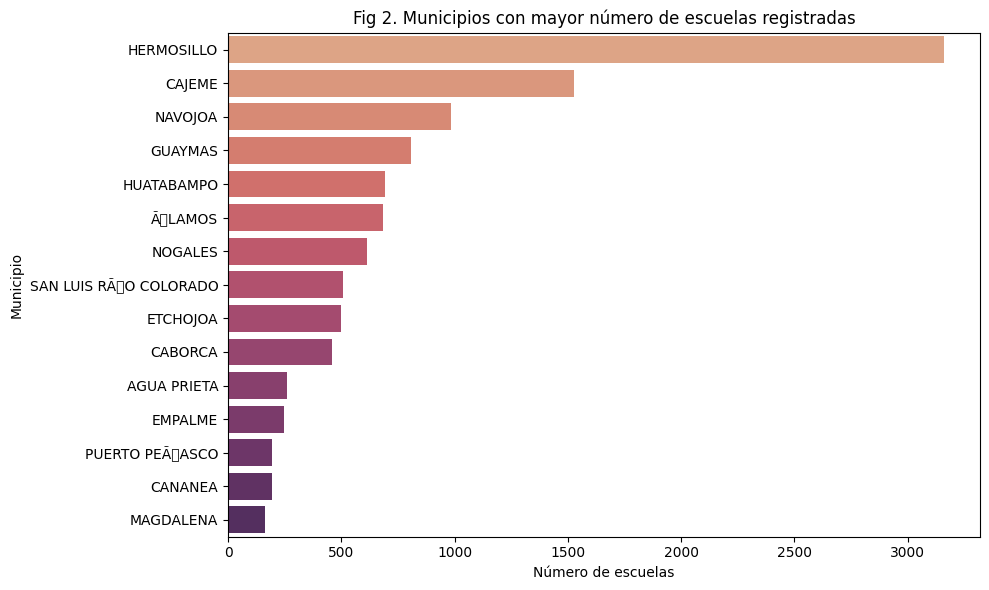

municipio
HERMOSILLO                3162
CAJEME                    1527
NAVOJOA                    983
GUAYMAS                    807
HUATABAMPO                 693
ÃLAMOS                    686
NOGALES                    615
SAN LUIS RÃO COLORADO     509
ETCHOJOA                   499
CABORCA                    459
Name: cct, dtype: int64


In [10]:
# ==========================================
# 7. Conteo de escuelas por municipio
# ==========================================
escuelas_mpio = df.groupby("municipio")["cct"].count().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(y=escuelas_mpio.head(15).index, x=escuelas_mpio.head(15).values, palette="flare")
plt.title("Fig 2. Municipios con mayor número de escuelas registradas")
plt.xlabel("Número de escuelas")
plt.ylabel("Municipio")
plt.tight_layout()

mayor_path = os.path.join(FIG_DIR, "municipios_con_mas_escuelas.png")
plt.savefig(mayor_path, dpi=200)


plt.show()

print(escuelas_mpio.head(10))


In [114]:
# ==========================================
# 8. Proporción público/privado por municipio
# ==========================================

columna_estatus = 'estatus'
valor='ACTIVO'

filtro_activo = df['estatus'] == valor

df = df[filtro_activo]


tabla_sost = (
    df.groupby(["municipio", "sostenimiento"])["cct"]
      .count().unstack(fill_value=0)
)



tabla_sost["total"] = tabla_sost.sum(axis=1)
tabla_sost["porc_privadas"] = (tabla_sost.get("PRIVADO", 0) / tabla_sost["total"]) * 100

#tabla_sost.sort_values("porc_privadas", ascending=False).head(10)
tabla_sost.sort_values("porc_privadas", ascending=False)


sostenimiento,PRIVADO,PÚBLICO,total,porc_privadas
municipio,,,,
NOGALES,149,276,425,35.058824
HERMOSILLO,581,1159,1740,33.390805
CANANEA,35,82,117,29.914530
AGUA PRIETA,46,113,159,28.930818
CAJEME,241,616,857,28.121354
...,...,...,...,...
TUBUTAMA,0,14,14,0.000000
VILLA HIDALGO,0,11,11,0.000000
URES,0,52,52,0.000000


In [119]:
porc_priv = tabla_sost.reset_index().copy()
porc_priv.to_csv("../data/processed/porcentaje_escuelas_privadas_sonora.csv", index=False)
print("💾 Archivo guardado en data/processed/porcentaje_escuelas_privadas_sonora.csv")
porc_priv

💾 Archivo guardado en data/processed/porcentaje_escuelas_privadas_sonora.csv


sostenimiento,municipio,PRIVADO,PÚBLICO,total,porc_privadas
0,ACONCHI,0,14,14,0.000000
1,AGUA PRIETA,46,113,159,28.930818
2,ALTAR,1,32,33,3.030303
3,ARIVECHI,0,9,9,0.000000
4,ARIZPE,0,19,19,0.000000
...,...,...,...,...,...
67,VILLA HIDALGO,0,11,11,0.000000
68,VILLA PESQUEIRA,0,15,15,0.000000
69,YÃCORA,3,54,57,5.263158
70,ÁLAMOS,2,289,291,0.687285


In [115]:
# ==========================================
# 9. Guardar versión limpia para cruces
# ==========================================
df_limpio = df.copy()
df_limpio.dropna(subset=["municipio"], inplace=True)

df_limpio.to_csv("../data/processed/catalogo_escuelas_sonora_limpio.csv", index=False)
print("💾 Archivo limpio guardado en data/processed/catalogo_escuelas_sonora_limpio.csv")


💾 Archivo limpio guardado en data/processed/catalogo_escuelas_sonora_limpio.csv
